In [0]:
import random

def aboveline(x1,x2,x3):
#   x[1] = m * x[0] + b
#   need to pick m and b so x1 and x2 are hit
    m = (x2[1] - x1[1])/(x2[0] - x1[0])
#    b = x1[1] * (x2[0] - x1[0]) - (x2[1] - x1[1]) * x1[0]
    b = x1[1] - m * x1[0]
#    slope2 = (x3[1] - x1[1])/(x3[0]-x1[0])
    return(x3[1] > m * x3[0] + b)

def comfort(temp,rh):
#    rh,  temp
#    86.5,67.1
#    29.3,69.0
# from https://www.azosensors.com/article.aspx?ArticleID=487
    return(
         aboveline([86.5,67.1],[29.3,69.0],[rh,temp]) and
         aboveline([29.3,69.0],[23.0,76.0],[rh,temp]) and
         not aboveline([23.0,76.0],[58.3,74.3],[rh,temp]) and
         not aboveline([58.3,74.3],[86.5,67.1],[rh,temp]))

# Create data
N = 500
temp = [random.uniform(65,77) for i in range(N)]
rh = [random.uniform(15,90) for i in range(N)]

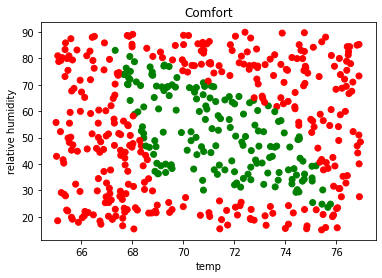

In [2]:
import matplotlib.pyplot as plt

# Plot
colors = ["red", "green"]
color = [colors[comfort(temp[i],rh[i])] for i in range(N)]

plt.scatter(temp, rh, c=color)
plt.title('Comfort')
plt.xlabel('temp')
plt.ylabel('relative humidity')
plt.show()

476


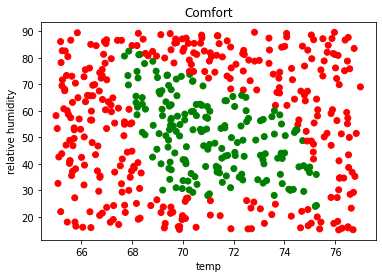

In [3]:
from sklearn import tree

# training a decision-tree classifier
N = 500
temp = [random.uniform(65,77) for i in range(N)]
rh = [random.uniform(15,90) for i in range(N)]
colors = ["red", "green"]
color = [colors[comfort(temp[i],rh[i])] for i in range(N)]
dat = [[temp[i],rh[i]] for i in range(N)]
labs = [comfort(temp[i],rh[i]) for i in range(N)]

clf = tree.DecisionTreeClassifier(max_leaf_nodes=7)

clf = clf.fit(dat, labs)
correct = 0
for i in range(N):
    if clf.predict([dat[i]]) == labs[i]: correct = correct + 1
print(correct)

# Plot
plt.scatter(temp, rh, c=color)
plt.title('Comfort')
plt.xlabel('temp')
plt.ylabel('relative humidity')
plt.show()

9127


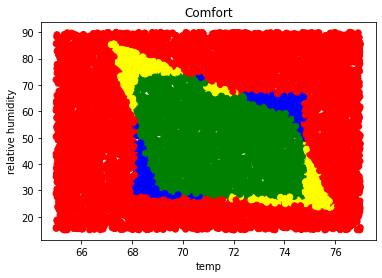

In [4]:
# Create test data
testN = 10000

testtemp = [random.uniform(65,77) for i in range(testN)]
testrh = [random.uniform(15,90) for i in range(testN)]
testdat = [[testtemp[i],testrh[i]] for i in range(testN)]
testlabs = [comfort(testtemp[i],testrh[i]) for i in range(testN)]

colors = ["red", "yellow", "blue", "green"]
color = [colors[clf.predict([testdat[i]])[0]*2 + testlabs[i]] for i in range(testN)]
# color = [colors[clf.predict([dat[i]])[0]*2] for i in range(N)]
#color = [colors[labs[i]] for i in range(N)]

correct = 0
for i in range(testN):
    if clf.predict([testdat[i]]) == testlabs[i]: correct = correct + 1
print(correct)

# Plot
plt.scatter(testtemp, testrh, c=color)
plt.title('Comfort')
plt.xlabel('temp')
plt.ylabel('relative humidity')
plt.show()

In [5]:
from sklearn import neighbors

# training a NN classifier
# N = 500
# temp = [random.uniform(65,77) for i in range(N)]
# rh = [random.uniform(15,90) for i in range(N)]
colors = ["red", "green"]
color = [colors[comfort(temp[i],rh[i])] for i in range(N)]
# dat = [[temp[i],rh[i]] for i in range(N)]
# labs = [comfort(temp[i],rh[i]) for i in range(N)]

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(dat, labs)

correct = 0
for i in range(N):
    if clf.predict([dat[i]]) == labs[i]: correct = correct + 1
print(correct)

488


9229


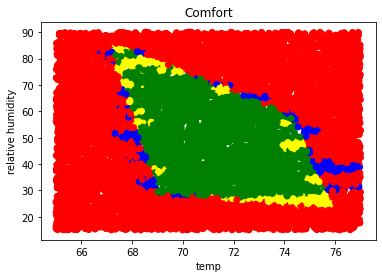

In [6]:
# Create test data
testN = 10000

testtemp = [random.uniform(65,77) for i in range(testN)]
testrh = [random.uniform(15,90) for i in range(testN)]
testdat = [[testtemp[i],testrh[i]] for i in range(testN)]
testlabs = [comfort(testtemp[i],testrh[i]) for i in range(testN)]

colors = ["red", "yellow", "blue", "green"]
color = [colors[clf.predict([testdat[i]])[0]*2 + testlabs[i]] for i in range(testN)]
# color = [colors[clf.predict([dat[i]])[0]*2] for i in range(N)]
#color = [colors[labs[i]] for i in range(N)]

# print(clf.predict([dat[i]])[0])
 
correct = 0
for i in range(testN):
    if clf.predict([testdat[i]]) == testlabs[i]: correct = correct + 1
print(correct)

# Plot
plt.scatter(testtemp, testrh, c=color)
plt.title('Comfort')
plt.xlabel('temp')
plt.ylabel('relative humidity')
plt.show()

In [7]:
len(temp)

500

In [0]:
dists = [(68-temp[i])**2 + (75-rh[i])**2 for i in range(N)]

In [9]:
min(dists)

0.05103682561557471

In [10]:
[i for i in range(N) if dists[i] < 2 ]

[236, 259, 298, 488]

In [13]:
import math

d = 5
a = [random.randint(0,1) for i in range(d)]
b = [random.randint(0,1) for i in range(d)]
math.sqrt(sum([(a[i]-b[i])**2 for i in range(d)]))
sum([abs(a[i]-b[i]) for i in range(d)])


3

In [14]:
from sklearn import neighbors

# training a NN classifier
# N = 500
# temp = [random.uniform(65,77) for i in range(N)]
# rh = [random.uniform(15,90) for i in range(N)]
colors = ["red", "green"]
color = [colors[comfort(temp[i],rh[i])] for i in range(N)]
scale = 7
dat = [[scale*temp[i],rh[i]] for i in range(N)]
# labs = [comfort(temp[i],rh[i]) for i in range(N)]

clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(dat, labs)

correct = 0
for i in range(N):
    if clf.predict([dat[i]]) == labs[i]: correct = correct + 1
print(correct)

490


In [0]:
# Create test data
testN = 10000

testtemp = [random.uniform(65,77) for i in range(testN)]
testrh = [random.uniform(15,90) for i in range(testN)]

9688


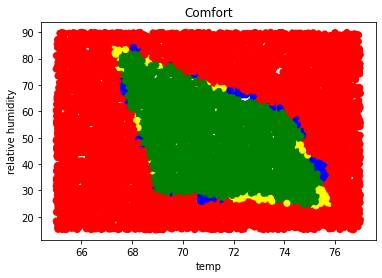

In [16]:
# check testing performance

testdat = [[scale*testtemp[i],testrh[i]] for i in range(testN)]
testlabs = [comfort(testtemp[i],testrh[i]) for i in range(testN)]

colors = ["red", "yellow", "blue", "green"]
color = [colors[clf.predict([testdat[i]])[0]*2 + testlabs[i]] for i in range(testN)]
# color = [colors[clf.predict([dat[i]])[0]*2] for i in range(N)]
#color = [colors[labs[i]] for i in range(N)]

# print(clf.predict([dat[i]])[0])
 
correct = 0
for i in range(testN):
    if clf.predict([testdat[i]]) == testlabs[i]: correct = correct + 1
print(correct)

# Plot
plt.scatter(testtemp, testrh, c=color)
plt.title('Comfort')
plt.xlabel('temp')
plt.ylabel('relative humidity')
plt.show()